<a href="https://colab.research.google.com/github/mgarbanzo/MeteoPythonUCR/blob/main/2_Graficaci%C3%B3n_simple_de_tablas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

UNIVERSIDAD DE COSTA RICA

Escuela de Física

Departamento de Física Atmosférica, Oceánica y Planetaria

Centro Regional de Formación Meteorológica

Prof. Marcial Garbanzo Salas, M.Sc., PhD

Curso: Instrumentos Meteorológicos

# En este notebook aprenderemos acerca de como leer y utilizar algunos datos de estación meteorológica automática.

Importamos las bibliotecas


In [1]:
import numpy as np          # Numpy es para arreglos numéricos
import pylab as plt         # Pylab es para graficación 
import pandas as pd         # Esta es nueva! Se llama Pandas y es para manejo de Tablas de datos

# Archivos
En la dirección: https://github.com/mgarbanzo/MeteoPythonUCR existen dos archivos con datos (i) EMA.dat y (ii) radiosonda_02080506z.txt.data, debe descargarlos de github y subirlos a colab. Los debe colocar en la carpeta que aparece a la izquierda de este texto.

En esta práctica vamos a graficar ambos archivos.

Procedemos a ver si los archivos ya están disponibles en este notebook ejecutando el siguiente comando. SI NO VE LOS NOMBRES DE LOS ARCHIVOS NO CONTINÚE YA QUE NO PODRÁ EJECUTAR LOS COMANDOS SATISFACTORIAMENTE.

In [3]:
!ls

EMA.dat  radiosonda_02080506z.txt.data	sample_data


# Lectura de información

En el siguiente paso vamos a leer todos los datos contenidos en el archivo datos.dat, que contiene 24 horas de     información de una estación meteorológica experimental creada en la UCR y ubicada Guanacaste. El contenido del archivo se ve de la siguiente manera:

    2017-10-11T00:00:00.224664,98.1,75.4,0.00,0.45,100486.25,4.17
    2017-10-11T00:00:01.257402,98.1,75.4,0.00,0.45,100482.25,4.16
    2017-10-11T00:00:02.291899,98.0,75.4,0.00,0.45,100484.50,4.15
    2017-10-11T00:00:03.224763,98.0,75.4,0.00,0.45,100486.50,4.14
    2017-10-11T00:00:04.258259,98.0,75.4,0.00,0.45,100483.25,4.14
    2017-10-11T00:00:05.292003,98.1,75.4,0.00,0.45,100483.25,4.15
    2017-10-11T00:00:06.225000,98.1,75.4,0.00,0.45,100483.00,4.14
    2017-10-11T00:00:07.259238,98.0,75.4,0.00,0.45,100488.50,4.17
    2017-10-11T00:00:08.292861,98.0,75.4,0.00,0.45,100482.00,4.14
    2017-10-11T00:00:09.225987,98.0,75.4,0.00,0.45,100484.25,4.15
    ...

todas las líneas deben tener el mismo formato y cantidad de columnas.

Para leer sus datos podemos utilizar una función de **Pandas**. La función read_csv lee valores de un archivo donde los valores en cada línea de los datos se separan con una coma.

Indicamos que el archivo no contiene un encabezado con la opción:
>header=None.

Cada columna la podemos leer con un nombre asignado dentro de la tabla. Por ejemplo el parámetro *names* los asigna en orden:

>names=('FECHAS', 'TEMPF', 'HR', 'ACUMPREC', 'PREC', 'DESCONOCIDA1','DESCONOCIDA2')

Finalmente podemos leer las columnas directamente en formatos aceptables para el dato. Por ejemplo la temperatura es una variable de punto flotante que se representa en Numpy como np.float64 mientras que la fecha y hora al contener la letra T debe leerse como una cadena de caracteres o str en Python. Eso de define utilizando el parámetro *dtypes* de la siguiente manera:

>dtype={'FECHAS': str, 'HR': np.float64, 'TEMPF': np.float64}

Procedemos a ejecutar el comando completo en la siguiente casilla:

In [4]:
tabla = pd.read_csv('/content/EMA.dat',
                   header=None, 
                   names=('FECHAS', 'HR', 'TEMPF', 'ACUMPREC', 'PREC', 'DESCONOCIDA1','DESCONOCIDA2'),
                   dtype={'FECHAS': str, 'HR': np.float64, 'TEMPF': np.float64})

Lo primero que debemos hacer es revisar que los datos fueron leidos correctamente! Mostramos entonces la información de los datos con el método **info()**! 

Recuerde la conversación de clases de programación orientada a objetos y vea como la tabla de datos leida es un objeto llamado tabla e info es un método que se aplica la tabla sobre si misma!

In [6]:
tabla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86434 entries, 0 to 86433
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   FECHAS        86434 non-null  object 
 1   HR            86434 non-null  float64
 2   TEMPF         86434 non-null  float64
 3   ACUMPREC      86434 non-null  float64
 4   PREC          86434 non-null  float64
 5   DESCONOCIDA1  86434 non-null  float64
 6   DESCONOCIDA2  86434 non-null  float64
dtypes: float64(6), object(1)
memory usage: 4.6+ MB


Interprete la información obtenida de manera que pueda contestar lo siguiente:
- ¿Cuantas líneas tiene el archivo?
- ¿Cuanta memoria utiliza la tabla?

Ahora continuamos con un análisis de las variables contenidas.

# Tiempo

Las fechas aparecen de tipo *object* (revise el resultado de info() anterior para verlo claramente), significando que no tiene ningún formato especial, es solo cualquier objeto. Por otro lado las demás variables si son de formato float64. Estas variables se puede utilizar en ese formato por el resto del programa pero las fechas y horas deben ser reformateadas para que Python las interprete como tiempo.

Lo anterior lo podemos comprobar al tratar de restar dos tiempos!

Por ejemplo 5 segundos menos 3 segundos es 2 segundos! 

Problemos si se puede hacer eso con las fechas en estado actual! Hagamos la resta de la fecha 1 y la fecha 0.

In [8]:
tabla['FECHAS'][1] - tabla['FECHAS'][0]

TypeError: ignored

Se obtiene un error porque **(como se indica)** no se pueden restar cadenas de caracteres (strings)!

Lo que podemos hacer es ahora transformar esas fechas en objetos tipo fecha, de manera que se puedan manejar como tiempos.

Para eso existe una función de Pandas llamada **to_datetime()**. Note que no debemos especificar el formato ya que la biblioteca es "inteligente" e infiere al observar los patrones para definir el formato.

In [9]:
tabla['FECHAS'] = pd.to_datetime(tabla['FECHAS'])

Una vez transformadas las fechas podemos intentar hacer una resta de tiempos nuevamente:

In [10]:
tabla['FECHAS'][1] - tabla['FECHAS'][0]

Timedelta('0 days 00:00:01.032738')

Note que entre la primera y la segunda medición existen solamente 1.03 segundos.

¿Existirá la misma separación entre todos los tiempos de medición? ¡Pruede algunos valores!

# Información

Podemos observar cualquier variable de la tabla *tabla* con solo indicar su nombre. Por ejemplo si necesitamos los datos de Temperatura (que están en Farenheit en el archivo) los podemos pedir con el comando:

Pruebe esto para las otras variables de la tabla!

In [12]:
tabla['TEMPF']

0        75.4
1        75.4
2        75.4
3        75.4
4        75.4
         ... 
86429    76.1
86430    76.1
86431    76.1
86432    76.1
86433    76.1
Name: TEMPF, Length: 86434, dtype: float64

Vamos a trabajar en contestar las siguientes preguntas:

- ¿Cuál es el promedio de temperaturas en celcius? 
- ¿Cual fue la T mínima y la máxima? 
- ¿A que hora ocurrieron? 
- ¿Están los tiempos en hora local o UTC?
- ¿Cuál es la desviación estandar de la serie de Humedad Relativa?

Para lo anterior podemos convertir los valores de T de *F* a *C* con la ecuación:

$$ C = \frac{5}{9}(F - 32)$$

Una vez respondidas esas preguntas pasaremos a la inferencia de información al utilizar nuestros conocimientos en meteorología parar averiguar cuál es la variable llamada DESCONOCIDA1 así como sus unidades.

### Respondamos algunas preguntas

Para calcular el promedio de temperatura en celcius primero tenemos que convertir la serie a esa unidad y almacenar el resultado en una variable que podemos llamar **Tc**.

En lugar de hacer cálculos "a la antigua" podemos utilizar métodos existentes de Python para calcular promedios, máximos y mínimos de la siguiente manera:

In [13]:
Tc = (5/9) * (tabla['TEMPF'] - 32)

promedio = Tc.mean()
maximo = Tc.max()
minimo = Tc.min()


print(promedio, maximo, minimo)

26.518772833740226 32.16666666666667 23.61111111111111


Para encontrar las horas a las que ocurren los máximos y mínimos vamos a utilizar una técnica de Python que consiste en utilizar listas para pedir índices específicos. Python puede comparar una lista contra un número específico, por ejemplo:

> Tc > 30

En ese ejemplo, Python genera una lista pero que indica si la casilla correspondiente cumple la condición (True) o si no la cumple (False). Veamos el resultado siguiente:

In [14]:
Tc > 30

0        False
1        False
2        False
3        False
4        False
         ...  
86429    False
86430    False
86431    False
86432    False
86433    False
Name: TEMPF, Length: 86434, dtype: bool

Debido a que la lista resultante es muy larga solamente puedo ver las primeras y últimos 5 entradas. ¿Cómo saber si existe alguna entrada de las 86434 que si cumplió la condición? Las podemos contar con numpy!

> np.sum(Tc > 30)

nos brindará la información necesaria:

In [15]:
np.sum(Tc>30) # En esta suma los False valen 0 y los True valen 1. 
              # Por tanto tenemos 9943 de las 86434 entradas mayores a 30

9943

Volviendo a las *horas* de máximos y mínimos. Podemos utilizar la lista que contiene False y True para solicitar a otra lista que nos brinde solo aquellas entradas que corresponden a un True. Entonces, vamos a crear una lista que llamaremos **indicesMax** que contendrá los True (y False) resultados de comparar igualdad con el valor máximo de la serie de tiempo.

¡Luego usaremos esa lista para pedir las fechas que cumplen con la condición de igualdad al valor máximo!

In [16]:
indicesMax = tabla['TEMPF'] == np.max(tabla['TEMPF'])

tabla['FECHAS'][indicesMax]

40448   2017-10-11 11:13:46.730983
40452   2017-10-11 11:13:50.667343
40458   2017-10-11 11:13:56.672450
40459   2017-10-11 11:13:57.706325
40460   2017-10-11 11:13:58.741059
                   ...            
40558   2017-10-11 11:15:36.685747
40559   2017-10-11 11:15:37.622025
40560   2017-10-11 11:15:38.654740
40562   2017-10-11 11:15:40.622358
40565   2017-10-11 11:15:43.625223
Name: FECHAS, Length: 107, dtype: datetime64[ns]

Podemos hacer lo mismo con los valores mínimos, pero cambiando el nombre de la lista:

In [17]:
indicesMin = tabla['TEMPF'] == np.min(tabla['TEMPF'])

tabla['FECHAS'][indicesMin]

17433   2017-10-11 04:50:23.507842
17435   2017-10-11 04:50:25.475325
17438   2017-10-11 04:50:28.477196
17448   2017-10-11 04:50:38.515636
17449   2017-10-11 04:50:39.450014
                   ...            
17691   2017-10-11 04:54:41.309222
17692   2017-10-11 04:54:42.343213
17701   2017-10-11 04:54:51.347542
17713   2017-10-11 04:55:03.352845
17716   2017-10-11 04:55:06.353342
Name: FECHAS, Length: 215, dtype: datetime64[ns]

Observando los valores obtenidos y conociendo el clima de Guanacaste, ¿considera que las horas están en UTC u hora local?

Para obtener el valor de desviación estándar de la Humedad Relativa podemos utilizar un método existente de Numpy:

In [18]:
np.std(tabla['HR'])

8.923961033883144

### Identificación de variable desconocida 1

Aquí se muestran los valores iniciales y finales de la variable desconocida 1. ¿Puede identificar los valores con solo esas 10 muestras?

In [19]:
tabla['DESCONOCIDA1']

0        100486.25
1        100482.25
2        100484.50
3        100486.50
4        100483.25
           ...    
86429    100544.00
86430    100546.25
86431    100543.50
86432    100543.00
86433    100542.00
Name: DESCONOCIDA1, Length: 86434, dtype: float64

Para poder hacerlo de una mejor manera es recomendable graficar los datos para poder mejorar nuestra comprensión. En la siguiente sección se graficarán las series de tiempo para identificar más facilmente las variables desconocidas.

# Graficación

Ahora vamos a graficar algunas de estas variables. Esto nos servirá para entender mejor el comportamiento y el contenido de las variables.

Primero graficamos la variable DESCONOCIDA1:

Recuerde que: Se tienen miles de puntos en 24 horas. El siguiente gráfico parece una función contínua pero en realidad son puntos discretos. La segunda línea de graficación se incluye para mostrar con puntos rojos el efecto de utilizar solo 1 de cada mil puntos disponibles para graficar los datos.

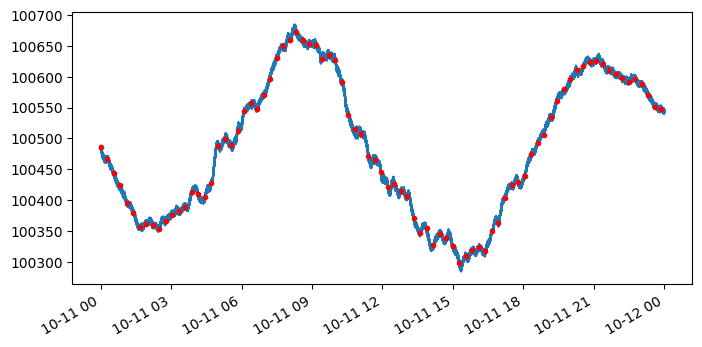

In [22]:
fig = plt.figure(figsize=(8,4),dpi=100)
plt.plot(tabla['FECHAS'],tabla['DESCONOCIDA1'])
plt.plot(tabla['FECHAS'][::1000],tabla['DESCONOCIDA1'][::1000],'.r')

fig.autofmt_xdate()

**¿Puede reconocer la variable?** Santa Cruz de Guanacaste está aproximadamente a 50 metros sobre el nivel del mar, así que es esperable que la presión atmosférica tenga valores cercanos a una atmósfera completa. Además la presión atmosférica tiene un comportamiento de un doble pico máximo en esa región (uno en la mañana y otro en la noche). ¿Queda claro ahora cuál es la variables desconocida1?

Volviendo al problema de UTC u hora local, para estar seguros del tiempo podemos observar la temperatura convertida a celcius. Grafíquemosla!

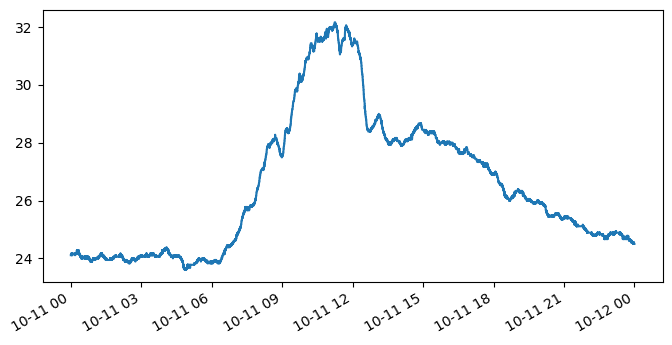

In [24]:
fig = plt.figure(figsize=(8,4),dpi=100)
plt.plot(tabla['FECHAS'],Tc)
fig.autofmt_xdate()

Para concluir esta práctica se hace una introducción a histogramas y gráficos de dispersión a continuación.

# Histogramas

Una herramienta muy util en meteorología y particularmente en instrumentación es poder crear histogramas!

Hagamos algunos para observar el comportamiento de las variables.

La función hist() de pylab se encarga de procesar los datos de acuerdo al número de casillas (bins) que se le indica.

Puede obtener más información en la dirección:

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

O pidiendo la ayuda de la función con el comando 
>plt.hist?


(array([0.00085021, 0.00455112, 0.01143616, 0.01953815, 0.0239059 ,
        0.0237892 , 0.02033835, 0.01155285, 0.01028587, 0.00456779,
        0.00401766, 0.0047345 , 0.0039343 , 0.00430106, 0.00776858,
        0.0062182 , 0.00583477, 0.0055347 , 0.00510126, 0.00338417,
        0.00165041, 0.00258397, 0.00145036, 0.0018838 , 0.00185046,
        0.00636824, 0.02205544, 0.02547295, 0.03427512, 0.06561619,
        0.05919794, 0.03830945, 0.02223882, 0.02427266, 0.03412509,
        0.02437268, 0.03444183, 0.01368671, 0.01221968, 0.01030254,
        0.02532291, 0.08263706, 0.0766189 , 0.07431834, 0.09393984,
        0.06828351, 0.13800072, 0.13428313, 0.10806   , 0.02143862]),
 array([ 65.8  ,  66.494,  67.188,  67.882,  68.576,  69.27 ,  69.964,
         70.658,  71.352,  72.046,  72.74 ,  73.434,  74.128,  74.822,
         75.516,  76.21 ,  76.904,  77.598,  78.292,  78.986,  79.68 ,
         80.374,  81.068,  81.762,  82.456,  83.15 ,  83.844,  84.538,
         85.232,  85.926,  86.62 ,

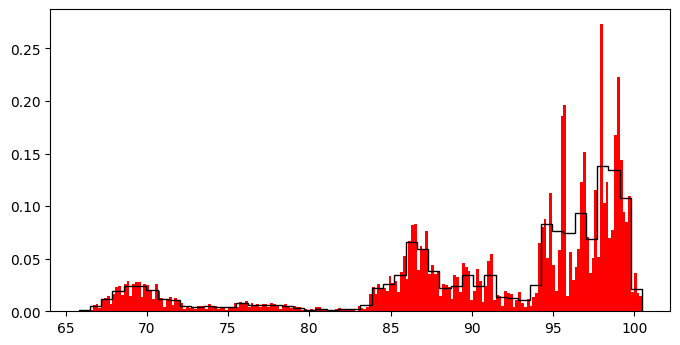

In [26]:
plt.figure(figsize=(8,4),dpi=100)
plt.hist(tabla['HR'],bins=200, color='red', density=True)
plt.hist(tabla['HR'],bins=50, color='black', density=True, histtype='step')


Interprete el gráfico obtenido. Si tiene dudas consulte con su profesor!

Podemos convertir la presión atmosférica (desconocida 1) a hecto Pascales dividiendo por 100 y luego hacer un histograma:

(array([  5.,  24.,  65., 137., 102.,  78.,  87.,  87., 118., 145., 311.,
        303., 288., 252., 391., 618., 658., 568., 607., 549., 403., 284.,
        270., 311., 410., 393., 385., 393., 402., 396., 511., 528., 394.,
        322., 527., 805., 998., 986., 756., 758., 896., 770., 636., 420.,
        331., 317., 488., 501., 575., 540., 561., 535., 488., 442., 322.,
        273., 366., 557., 549., 491., 521., 613., 685., 712., 728., 798.,
        861., 878., 801., 819., 655., 560., 622., 644., 587., 475., 354.,
        241., 147., 126., 134., 126., 148., 194., 230., 255., 312., 348.,
        457., 599., 679., 608., 418., 254., 144., 183., 293., 289., 277.,
        353., 479., 443., 494., 475., 472., 408., 429., 343., 323., 386.,
        437., 520., 449., 408., 441., 364., 284., 294., 281., 267., 218.,
        166., 177., 198., 263., 303., 192., 131., 168., 346., 558., 729.,
        758., 684., 654., 591., 451., 322., 281., 331., 330., 369., 463.,
        501., 431., 412., 378., 397., 

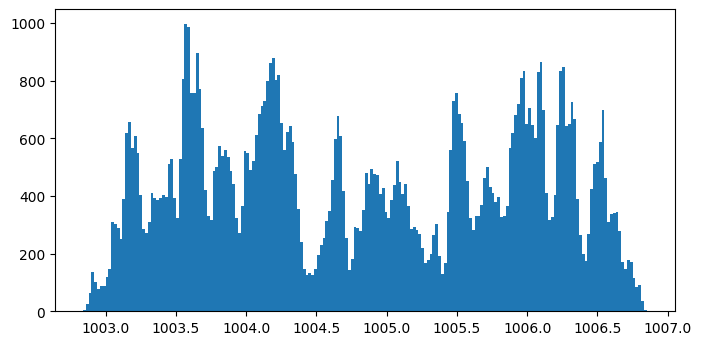

In [28]:
plt.figure(figsize=(8,4),dpi=100)
plt.hist(tabla['DESCONOCIDA1']/100,bins=200)

Similarmente para la temperatura. 
- ¿Que información puede extraer de esa gráfica? 
- ¿Fue más probable tener calor ( > 30 C) o estar cómodo ( < 25 C) ese día en Santa Cruz? 

(array([ 598., 1112., 1474., 6159., 2760., 8061., 2180., 1009.,  460.,
         796.,  403.,  979., 1483., 1224., 4292.,  241.,  619., 1130.,
         285.,  430., 1539., 1242., 1535.,  181.,  442., 1357.,  517.,
        2282.,  850., 1407.,    0., 1602.,  152.,  312.,  335.,  400.,
           0.,  248., 1052.,  194.,  677.,  261.,  762.,  618.,  701.,
         462., 1456.,  969.,  684.,  535., 2133., 4212., 1428., 1252.,
         506., 2570., 1142., 1206.,  442.,  562.,  368.,  471.,  414.,
          56.,  151.,    0.,   98.,   58.,  184.,   47.,   99.,    0.,
         389.,   95.,  141.,  272.,  186.,  204.,  283.,  152.,   50.,
         108.,   58.,  114.,  119.,  537.,  110.,  336.,  335.,  390.,
         737.,  660., 1434.,  800.,  495.,  408.,  661.,  530.,  725.,
         239.]),
 array([23.61111111, 23.69666667, 23.78222222, 23.86777778, 23.95333333,
        24.03888889, 24.12444444, 24.21      , 24.29555556, 24.38111111,
        24.46666667, 24.55222222, 24.63777778, 24.723333

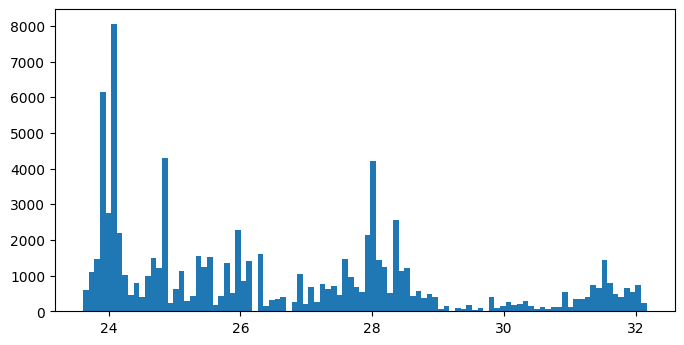

In [30]:
plt.figure(figsize=(8,4),dpi=100)
plt.hist(Tc,bins=100)

# Dispersión

Regularmente se requiere en meteorología realizar gráficos de dispersión para observar la relación entre dos variables.

La función scatter() de pylab ayuda a crear facil y rapidamente este tipo de gráficos.

A continuación se muestra un gráfico de dispersión de la temperatura en F contra los valores de humedad relativa. Interprete el resultado.

Luego se realiza lo mismo para temperatura y presión, pero coloreando los puntos de acuerdo a la humedad relativa. ¿Que puede interpretar de esa gráfica?

Proceda a hacer algunas gráficas con las otras variables para práctica personal.

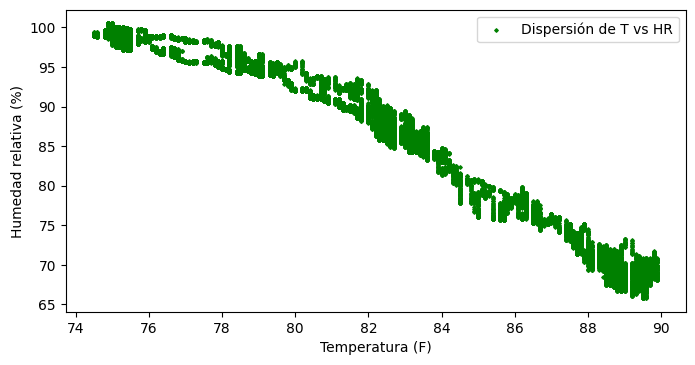

In [34]:
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(tabla['TEMPF'],tabla['HR'],s=3,c='g',marker='D',label="Dispersión de T vs HR")
plt.xlabel("Temperatura (F)")
plt.ylabel("Humedad relativa (%)")
plt.legend(loc=1)

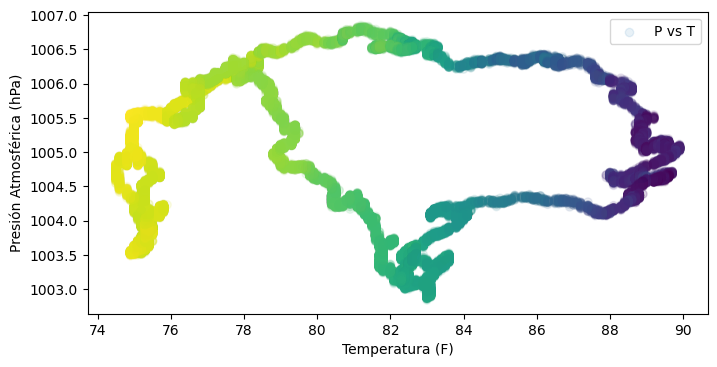

In [35]:
plt.figure(figsize=(8,4),dpi=100)
plt.scatter(tabla['TEMPF'],tabla['DESCONOCIDA1']/100.,c=tabla['HR'], alpha=0.1, label='P vs T')
plt.xlabel("Temperatura (F)")
plt.ylabel("Presión Atmosférica (hPa)")
plt.legend(loc=1)